# Nivell 1
## Exercici 1
#### Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_delay = pd.read_csv('C:/Users/xizes/DelayedFlights.csv')

In [3]:
pd.set_option('display.max_columns', None)
df_delay.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df_delay.shape

(1936758, 30)

## Pre-Processing

### Try different treatment with NaN values

I´ll try 3 different aproaches regarding the treatment of NaN values for each model:
1. Simply removing all NaN values from the df.
2. Fill all NaN values with 0.
3. Fill NaN values with 0 on columns [CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay] and then eliminate all rows containing NaN values.

In [5]:
#Check original amount of NaN values on df
df_delay.isna().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [6]:
#Check correlation of target variable (ArrDelay) with other columns on original df
df_delay.corrwith(df_delay['ArrDelay'])

Unnamed: 0           0.002571
Year                      NaN
Month               -0.000897
DayofMonth           0.004129
DayOfWeek            0.006123
DepTime              0.127017
CRSDepTime           0.044447
ArrTime             -0.050948
CRSArrTime           0.043078
FlightNum            0.061266
ActualElapsedTime    0.068130
CRSElapsedTime      -0.015676
AirTime             -0.000189
ArrDelay             1.000000
DepDelay             0.952927
Distance            -0.029853
TaxiIn               0.156277
TaxiOut              0.286484
Cancelled                 NaN
Diverted                  NaN
CarrierDelay         0.501773
WeatherDelay         0.264624
NASDelay             0.387606
SecurityDelay       -0.002488
LateAircraftDelay    0.478123
dtype: float64

**1 - Remove all NaN values and run corr again**

In [7]:
df_delay_no_nan = df_delay.dropna()

In [8]:
df_delay_no_nan.shape

(1247486, 30)

In [9]:
df_delay_no_nan.corrwith(df_delay['ArrDelay'])

Unnamed: 0           0.015138
Year                      NaN
Month                0.012338
DayofMonth           0.009072
DayOfWeek            0.011901
DepTime              0.093979
CRSDepTime           0.017093
ArrTime             -0.079235
CRSArrTime           0.024998
FlightNum            0.035803
ActualElapsedTime    0.083738
CRSElapsedTime       0.031566
AirTime              0.027509
ArrDelay             1.000000
DepDelay             0.950323
Distance             0.014959
TaxiIn               0.116314
TaxiOut              0.208441
Cancelled                 NaN
Diverted                  NaN
CarrierDelay         0.501777
WeatherDelay         0.264604
NASDelay             0.387609
SecurityDelay       -0.002488
LateAircraftDelay    0.478127
dtype: float64

**2 - Fill all NaN values with 0 and run corr again**

In [10]:
df_delay_fillna = df_delay.fillna(value=0)

In [11]:
df_delay_fillna.isna().sum()

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [12]:
df_delay_fillna.corrwith(df_delay_fillna['ArrDelay'])

Unnamed: 0           0.001867
Year                      NaN
Month               -0.001585
DayofMonth           0.003996
DayOfWeek            0.006166
DepTime              0.126764
CRSDepTime           0.044721
ArrTime             -0.042054
CRSArrTime           0.042888
FlightNum            0.061064
ActualElapsedTime    0.073452
CRSElapsedTime      -0.016546
AirTime              0.004856
ArrDelay             1.000000
DepDelay             0.946002
Distance            -0.030672
TaxiIn               0.158685
TaxiOut              0.284354
Cancelled           -0.013392
Diverted            -0.046959
CarrierDelay         0.545325
WeatherDelay         0.277843
NASDelay             0.451218
SecurityDelay        0.011269
LateAircraftDelay    0.557198
dtype: float64

**3 - Fill NaN values with 0 on columns [CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay] and then eliminate all rows containing NaN values**

In [13]:
#Create copy of the original df so I can manipulate it separately
df_delay_fillna_nonan = df_delay.copy()

In [14]:
#Fill NaN values with 0 on selected columns
df_delay_fillna_nonan[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']] = df_delay_fillna_nonan[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].fillna(value=0)

In [15]:
#Check NaN values
#df_delay_fillna_nonan.isna().sum()

In [16]:
#Drop all rows with NaN values
df_delay_fillna_nonan.dropna(inplace=True)

In [17]:
#Check NaN values after 
#df_delay_fillna_nonan.isna().sum()

In [18]:
df_delay_fillna_nonan.corrwith(df_delay_fillna_nonan['ArrDelay'])

Unnamed: 0           0.002572
Year                      NaN
Month               -0.000896
DayofMonth           0.004124
DayOfWeek            0.006121
DepTime              0.127017
CRSDepTime           0.044449
ArrTime             -0.050949
CRSArrTime           0.043079
FlightNum            0.061263
ActualElapsedTime    0.068130
CRSElapsedTime      -0.015676
AirTime             -0.000188
ArrDelay             1.000000
DepDelay             0.952926
Distance            -0.029852
TaxiIn               0.156277
TaxiOut              0.286482
Cancelled                 NaN
Diverted                  NaN
CarrierDelay         0.545016
WeatherDelay         0.277726
NASDelay             0.450765
SecurityDelay        0.011167
LateAircraftDelay    0.556652
dtype: float64

## Modeling

I´ll use 4 different models:
* Linear Regression
* Decision Tree Regression
* Random Forest Regression
* Neural Networks Regression

### Select features  for modeling and Split dataset.

I´ll handpick some features using the criteria below:

* Drop column 'Unnamed: 0' because it works only as a unique row id. 
* Drop column 'Year' because it only has one value (2008).
* Drop all categorical columns, and columns with correlation lower than 10% (arbitrary value).

In [19]:
from sklearn.model_selection import train_test_split

**1 - Select features and Split df_delay_no_nan dataset**

In [20]:
#Select features and target 
X_no_nan = df_delay_no_nan[['DepTime', 'DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']]
y_no_nan = df_delay_no_nan['ArrDelay']

#Split the data into train and test sets
X_train_no_nan, X_test_no_nan, y_train_no_nan, y_test_no_nan = train_test_split(X_no_nan, y_no_nan, test_size=0.33)

**2 - Select features and Split df_delay_fillna dataset** 

In [21]:
#Select features and target 
X_fillna = df_delay_fillna[['DepTime', 'DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']]
y_fillna = df_delay_fillna['ArrDelay']

#Split the data into train and test sets
X_train_fillna, X_test_fillna, y_train_fillna, y_test_fillna = train_test_split(X_fillna, y_fillna, test_size=0.33)

**3 - Select features and Split df_delay_fillna_nonan dataset** 

In [22]:
#Select features and target 
X_fillna_nonan = df_delay_fillna_nonan[['DepTime', 'DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']]
y_fillna_nonan = df_delay_fillna_nonan['ArrDelay']

#Split the data into train and test sets
X_train_fillna_nonan, X_test_fillna_nonan, y_train_fillna_nonan, y_test_fillna_nonan = train_test_split(X_fillna_nonan, y_fillna_nonan, test_size=0.33)

## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
#Create linear regression object
linear_regression = LinearRegression()

**1 - Linear Regression with df_delay_no_nan**

In [25]:
linear_regression_no_nan = linear_regression.fit(X_train_no_nan, y_train_no_nan)

**2 - Linear Regression with df_delay_fillna**

In [26]:
linear_regression_fillna = linear_regression.fit(X_train_fillna, y_train_fillna)

**3 - Linear Regression with df_delay_fillna_nonan**

In [27]:
linear_regression_fillna_nonan = linear_regression.fit(X_train_fillna_nonan, y_train_fillna_nonan)

## Decision Tree Regression

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
decision_tree_regression = DecisionTreeRegressor()

**1 - Decision Tree Regression with df_delay_no_nan**

In [30]:
decision_tree_regression_no_nan = decision_tree_regression.fit(X_train_no_nan, y_train_no_nan)

**2 - Decision Tree Regression with df_delay_fillna**

In [31]:
decision_tree_regression_fillna = decision_tree_regression.fit(X_train_fillna, y_train_fillna)

**3 - Decision Tree Regression with df_delay_fillna_nonan**

In [32]:
decision_tree_regression_fillna_nonan = decision_tree_regression.fit(X_train_fillna_nonan, y_train_fillna_nonan)

## Random Forest Regression

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
#We set max_depth=5 in order to have a smaller model, otherwise it can take to much time and memory
random_forest_regression = RandomForestRegressor(max_depth=5)

**1 - Random Forest Regression with df_delay_no_nan**

In [35]:
random_forest_regression_no_nan = random_forest_regression.fit(X_train_no_nan, y_train_no_nan)

**2 - Random Forest Regression with df_delay_fillna**

In [36]:
random_forest_regression_fillna = random_forest_regression.fit(X_train_fillna, y_train_fillna)

**3 - Decision Tree Regression with df_delay_fillna_nonan**

In [37]:
decision_tree_regression_fillna_nonan = random_forest_regression.fit(X_train_fillna_nonan, y_train_fillna_nonan)

## Neural Networks Regression

***For this model, I`ll use a sample of the population since Neural Networks has a lot of iterations and thus it becomes too heavy for the computer to process it.***

In [38]:
#Create sample dataframes
df_delay_no_nan_sample = df_delay_no_nan.sample(n=100000)
df_delay_fillna_sample = df_delay_fillna.sample(n=100000)
df_delay_fillna_nonan_sample = df_delay_fillna_nonan.sample(n=100000)

In [39]:
print(df_delay_no_nan_sample.shape)
print(df_delay_fillna_sample.shape)
print(df_delay_fillna_nonan_sample.shape)

(100000, 30)
(100000, 30)
(100000, 30)


**Select features and split sample datasets**

**1 - df_delay_no_nan-sample**

In [40]:
#Select features and target 
X_no_nan_sample = df_delay_no_nan_sample[['DepTime', 'DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']]
y_no_nan_sample = df_delay_no_nan_sample['ArrDelay']

#Split the data into train and test sets
X_train_no_nan_sample, X_test_no_nan_sample, y_train_no_nan_sample, y_test_no_nan_sample = train_test_split(X_no_nan_sample, y_no_nan_sample, test_size=0.33)

**2 - df_delay_fillna_sample** 

In [41]:
#Select features and target 
X_fillna_sample = df_delay_fillna_sample[['DepTime', 'DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']]
y_fillna_sample = df_delay_fillna_sample['ArrDelay']

#Split the data into train and test sets
X_train_fillna_sample, X_test_fillna_sample, y_train_fillna_sample, y_test_fillna_sample = train_test_split(X_fillna_sample, y_fillna_sample, test_size=0.33)

**3 - df_delay_fillna_nonan_sample** 

In [42]:
#Select features and target 
X_fillna_nonan_sample = df_delay_fillna_nonan_sample[['DepTime', 'DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']]
y_fillna_nonan_sample = df_delay_fillna_nonan_sample['ArrDelay']

#Split the data into train and test sets
X_train_fillna_nonan_sample, X_test_fillna_nonan_sample, y_train_fillna_nonan_sample, y_test_fillna_nonan_sample = train_test_split(X_fillna_nonan_sample, y_fillna_nonan_sample, test_size=0.33)

**Create Model**

In [43]:
#Import the Multi Layer Perceptron Regressor library 
from sklearn.neural_network import MLPRegressor

In [44]:
#We set hidden_layer_sizes to 3 layers with the same number of features as the datasets
neural_networks_regression = MLPRegressor(hidden_layer_sizes=(8,8,8))

**1 - Neural Networks Regression with df_delay_no_nan_sample**

In [45]:
neural_networks_regression_no_nan_sample = neural_networks_regression.fit(X_train_no_nan_sample, y_train_no_nan_sample)

**2 - Neural Networks Regression with df_delay_fillna_sample**

In [46]:
neural_networks_regression_fillna_sample = neural_networks_regression.fit(X_train_fillna_sample, y_train_fillna_sample)

**3 - Neural Networks Regression with df_delay_fillna_nonan_sample**

In [47]:
neural_networks_regression_fillna_nonan_sample = neural_networks_regression.fit(X_train_fillna_nonan_sample, y_train_fillna_nonan_sample)

_________________________________

## Exercici 2
#### Compara’ls en base al MSE i al R2

In [48]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

## Linear Regression

**1 - no_nan**

In [49]:
y_pred_linear_regression_no_nan = linear_regression_no_nan.predict(X_test_no_nan)

print('Linear Regression nonan')
print('-----------------------')
print(f'MSE: {mean_squared_error(y_test_no_nan, y_pred_linear_regression_no_nan)}')
print(f'R2: {r2_score(y_test_no_nan, y_pred_linear_regression_no_nan)}')

Linear Regression nonan
-----------------------
MSE: 5.943422537842758
R2: 0.998372803971074


**2 - fillna**

In [50]:
y_pred_linear_regression_fillna = linear_regression_fillna.predict(X_test_fillna)

print('Linear Regression fillna')
print('------------------------')
print(f'MSE: {mean_squared_error(y_test_fillna, y_pred_linear_regression_fillna)}')
print(f'R2: {r2_score(y_test_fillna, y_pred_linear_regression_fillna)}')

Linear Regression fillna
------------------------
MSE: 24.87747311445896
R2: 0.9921775119526166


**3 - fillna_nonan** 

In [51]:
y_pred_linear_regression_fillna_nonan = linear_regression_fillna_nonan.predict(X_test_fillna_nonan)

print('Linear Regression fillna nonan')
print('------------------------------')
print(f'MSE: {mean_squared_error(y_test_fillna_nonan, y_pred_linear_regression_fillna_nonan)}')
print(f'R2: {r2_score(y_test_fillna_nonan, y_pred_linear_regression_fillna_nonan)}')

Linear Regression fillna nonan
------------------------------
MSE: 24.533418492336946
R2: 0.992468043706835


## Decision Tree Regression

**1 - no_nan**

In [52]:
y_pred_decisiontree_regression_no_nan = decision_tree_regression_no_nan.predict(X_test_no_nan)

print('Decision Tree Regression nonan')
print('------------------------------')
print(f'MSE: {mean_squared_error(y_test_no_nan, y_pred_decisiontree_regression_no_nan)}')
print(f'R2: {r2_score(y_test_no_nan, y_pred_decisiontree_regression_no_nan)}')

Decision Tree Regression nonan
------------------------------
MSE: 5.148874681211183
R2: 0.998590336059508


**2 - fillna**

In [53]:
y_pred_decisiontree_regression_fillna = decision_tree_regression_fillna.predict(X_test_fillna)

print('Decision Tree Regression fillna')
print('-------------------------------')
print(f'MSE: {mean_squared_error(y_test_fillna, y_pred_decisiontree_regression_fillna)}')
print(f'R2: {r2_score(y_test_fillna, y_pred_decisiontree_regression_fillna)}')

Decision Tree Regression fillna
-------------------------------
MSE: 52.70433114042401
R2: 0.983427617487739


**3 - fillna_nonan**

In [54]:
y_pred_decisiontree_regression_fillna_nonan = decision_tree_regression_fillna_nonan.predict(X_test_fillna_nonan)

print('Decision Tree Regression fillna nonan')
print('-------------------------------------')
print(f'MSE: {mean_squared_error(y_test_fillna_nonan, y_pred_decisiontree_regression_fillna_nonan)}')
print(f'R2: {r2_score(y_test_fillna_nonan, y_pred_decisiontree_regression_fillna_nonan)}')

Decision Tree Regression fillna nonan
-------------------------------------
MSE: 151.7320277770522
R2: 0.953417050222861


## Random Forest Regression

**1 - no_nan**

In [55]:
y_pred_randomforest_regression_no_nan = random_forest_regression_no_nan.predict(X_test_no_nan)

print('Random Forest Regression nonan')
print('------------------------------')
print(f'MSE: {mean_squared_error(y_test_no_nan, y_pred_randomforest_regression_no_nan)}')
print(f'R2: {r2_score(y_test_no_nan, y_pred_randomforest_regression_no_nan)}')

Random Forest Regression nonan
------------------------------
MSE: 187.53776257575652
R2: 0.9486557281441899


**2 - fillna**

In [56]:
y_pred_randomforest_regression_fillna = random_forest_regression_fillna.predict(X_test_fillna)

print('Random Forest Regression fillna')
print('-------------------------------')
print(f'MSE: {mean_squared_error(y_test_fillna, y_pred_randomforest_regression_fillna)}')
print(f'R2: {r2_score(y_test_fillna, y_pred_randomforest_regression_fillna)}')

Random Forest Regression fillna
-------------------------------
MSE: 187.30474751880197
R2: 0.9411037792326097


**3 - fillna_nonan**

In [57]:
y_pred_randomforest_regression_fillna_nonan = random_forest_regression_no_nan.predict(X_test_fillna_nonan)

print('Random Forest Regression fillna nonan')
print('-------------------------------------')
print(f'MSE: {mean_squared_error(y_test_fillna_nonan, y_pred_randomforest_regression_fillna_nonan)}')
print(f'R2: {r2_score(y_test_fillna_nonan, y_pred_randomforest_regression_fillna_nonan)}')

Random Forest Regression fillna nonan
-------------------------------------
MSE: 151.7320277770522
R2: 0.953417050222861


## Neural Networks Regression

**1 - no_nan**

In [58]:
y_pred_neuralnet_regression_no_nan = neural_networks_regression_no_nan_sample.predict(X_test_no_nan_sample)

print('Neural Networks Regression nonan')
print('--------------------------------')
print(f'MSE: {mean_squared_error(y_test_no_nan_sample, y_pred_neuralnet_regression_no_nan)}')
print(f'R2: {r2_score(y_test_no_nan_sample, y_pred_neuralnet_regression_no_nan)}')

Neural Networks Regression nonan
--------------------------------
MSE: 5.618288872780123
R2: 0.998392288007539


**2 - fillna**

In [59]:
y_pred_neuralnet_regression_fillna = neural_networks_regression_fillna_sample.predict(X_test_fillna_sample)

print('Neural Networks Regression fillna')
print('---------------------------------')
print(f'MSE: {mean_squared_error(y_test_fillna_sample, y_pred_neuralnet_regression_fillna)}')
print(f'R2: {r2_score(y_test_fillna_sample, y_pred_neuralnet_regression_fillna)}')

Neural Networks Regression fillna
---------------------------------
MSE: 25.904590455450887
R2: 0.9917338910891843


**3 - fillna_nonan**

In [60]:
y_pred_neuralnet_regression_fillna_nonan = neural_networks_regression_fillna_nonan_sample.predict(X_test_fillna_nonan_sample)

print('Neural Networks Regression fillna nonan')
print('-------------------------------------')
print(f'MSE: {mean_squared_error(y_test_fillna_nonan_sample, y_pred_neuralnet_regression_fillna_nonan)}')
print(f'R2: {r2_score(y_test_fillna_nonan_sample, y_pred_neuralnet_regression_fillna_nonan)}')

Neural Networks Regression fillna nonan
-------------------------------------
MSE: 23.511138988777056
R2: 0.9921223344195192


______________________________

## Exercici 3
#### Entrena’ls utilitzant els diferents paràmetres que admeten.

***(In order to simplify I´ll choose the 3 best models to be further explored in the exercise: Linear Regression, Decision Tree and Neural Networks.)***

***(I´ll also use the dataset no_nan, for simplification purpose and because it had the best results.)***

**MSE definition** - Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error. Error in this case means the difference between the observed values y1, y2, y3, … and the predicted ones pred(y1), pred(y2), pred(y3), … We square each difference (pred(yn) – yn)) ** 2 so that negative and positive values do not cancel each other out.

**R2_score definition** - R squared is the percentage of variation explained by the correlation between two variables. It varies from 0 to 1 and the bigger the value, the more significative is the correlation between the dependent and non-dependent variables.

## Linear Regression

In [61]:
#Create linear regression object
linear_regression_2 = LinearRegression(fit_intercept=False)
linear_regression_3 = LinearRegression(normalize=True)
linear_regression_4 = LinearRegression(n_jobs=10)
linear_regression_5 = LinearRegression(fit_intercept=False, n_jobs=3)

In [62]:
#Create different models using different parameters
linear_regression_no_nan_2 = linear_regression_2.fit(X_train_no_nan, y_train_no_nan)
linear_regression_no_nan_3 = linear_regression_3.fit(X_train_no_nan, y_train_no_nan)
linear_regression_no_nan_4 = linear_regression_4.fit(X_train_no_nan, y_train_no_nan)
linear_regression_no_nan_5 = linear_regression_5.fit(X_train_no_nan, y_train_no_nan)

In [63]:
#Calculate the score of each models
y_pred_linear_regression_no_nan_2 = linear_regression_no_nan_2.predict(X_test_no_nan)
y_pred_linear_regression_no_nan_3 = linear_regression_no_nan_3.predict(X_test_no_nan)
y_pred_linear_regression_no_nan_4 = linear_regression_no_nan_4.predict(X_test_no_nan)
y_pred_linear_regression_no_nan_5 = linear_regression_no_nan_5.predict(X_test_no_nan)

print(f'Linear Regression Model 2 - MSE: {mean_squared_error(y_test_no_nan, y_pred_linear_regression_no_nan_2)}, R2: {r2_score(y_test_no_nan, y_pred_linear_regression_no_nan_2)}')
print(f'Linear Regression Model 3 - MSE: {mean_squared_error(y_test_no_nan, y_pred_linear_regression_no_nan_3)}, R2: {r2_score(y_test_no_nan, y_pred_linear_regression_no_nan_3)}')
print(f'Linear Regression Model 4 - MSE: {mean_squared_error(y_test_no_nan, y_pred_linear_regression_no_nan_4)}, R2: {r2_score(y_test_no_nan, y_pred_linear_regression_no_nan_4)}')
print(f'Linear Regression Model 5 - MSE: {mean_squared_error(y_test_no_nan, y_pred_linear_regression_no_nan_5)}, R2: {r2_score(y_test_no_nan, y_pred_linear_regression_no_nan_5)}')

Linear Regression Model 2 - MSE: 4.285526487938849, R2: 0.9988267043713229
Linear Regression Model 3 - MSE: 4.28343088022538, R2: 0.9988272781088501
Linear Regression Model 4 - MSE: 4.283430880225378, R2: 0.9988272781088501
Linear Regression Model 5 - MSE: 4.285526487938849, R2: 0.9988267043713229


## Decision Tree

In [64]:
decision_tree_regression_2 = DecisionTreeRegressor(criterion='friedman_mse')
decision_tree_regression_3 = DecisionTreeRegressor(splitter='random')
decision_tree_regression_4 = DecisionTreeRegressor(max_features='sqrt')
decision_tree_regression_5 = DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt')

In [65]:
decision_tree_regression_no_nan_2 = decision_tree_regression_2.fit(X_train_no_nan, y_train_no_nan)
decision_tree_regression_no_nan_3 = decision_tree_regression_3.fit(X_train_no_nan, y_train_no_nan)
decision_tree_regression_no_nan_4 = decision_tree_regression_4.fit(X_train_no_nan, y_train_no_nan)
decision_tree_regression_no_nan_5 = decision_tree_regression_5.fit(X_train_no_nan, y_train_no_nan)

In [66]:
y_pred_decisiontree_regression_no_nan_2 = decision_tree_regression_no_nan_2.predict(X_test_no_nan)
y_pred_decisiontree_regression_no_nan_3 = decision_tree_regression_no_nan_3.predict(X_test_no_nan)
y_pred_decisiontree_regression_no_nan_4 = decision_tree_regression_no_nan_4.predict(X_test_no_nan)
y_pred_decisiontree_regression_no_nan_5 = decision_tree_regression_no_nan_5.predict(X_test_no_nan)

print(f'Decision Tree Model 2 - MSE: {mean_squared_error(y_test_no_nan, y_pred_decisiontree_regression_no_nan_2)}, R2: {r2_score(y_test_no_nan, y_pred_decisiontree_regression_no_nan_2)}')
print(f'Decision Tree Model 3 - MSE: {mean_squared_error(y_test_no_nan, y_pred_decisiontree_regression_no_nan_3)}, R2: {r2_score(y_test_no_nan, y_pred_decisiontree_regression_no_nan_3)}')
print(f'Decision Tree Model 4 - MSE: {mean_squared_error(y_test_no_nan, y_pred_decisiontree_regression_no_nan_4)}, R2: {r2_score(y_test_no_nan, y_pred_decisiontree_regression_no_nan_4)}')
print(f'Decision Tree Model 5 - MSE: {mean_squared_error(y_test_no_nan, y_pred_decisiontree_regression_no_nan_5)}, R2: {r2_score(y_test_no_nan, y_pred_decisiontree_regression_no_nan_5)}')

Decision Tree Model 2 - MSE: 14.258048295847898, R2: 0.9960964176079494
Decision Tree Model 3 - MSE: 12.361946797321162, R2: 0.9966155341286408
Decision Tree Model 4 - MSE: 39.36335568937331, R2: 0.9892230620227448
Decision Tree Model 5 - MSE: 48.9552294186377, R2: 0.9865969894622224


## Neural Networks Regression

In [108]:
#We set hidden_layer_sizes to 3 layers with the same number of features as the datasets
neural_networks_regression_2 = MLPRegressor(hidden_layer_sizes=(8,8,8,8))
neural_networks_regression_3 = MLPRegressor(activation='logistic')
neural_networks_regression_4 = MLPRegressor(solver='lbfgs', max_iter=10000)
neural_networks_regression_5 = MLPRegressor(hidden_layer_sizes=(8,8,8), activation='logistic', solver='adam', max_iter=5000)

In [109]:
neural_networks_regression_no_nan_sample_2 = neural_networks_regression_2.fit(X_train_no_nan_sample, y_train_no_nan_sample)

C:\Users\xizes\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [110]:
neural_networks_regression_no_nan_sample_3 = neural_networks_regression_3.fit(X_train_no_nan_sample, y_train_no_nan_sample)

In [111]:
neural_networks_regression_no_nan_sample_4 = neural_networks_regression_4.fit(X_train_no_nan_sample, y_train_no_nan_sample)

In [112]:
neural_networks_regression_no_nan_sample_5 = neural_networks_regression_5.fit(X_train_no_nan_sample, y_train_no_nan_sample)

In [113]:
y_pred_neuralnet_regression_no_nan_2 = neural_networks_regression_no_nan_sample_2.predict(X_test_no_nan_sample)
y_pred_neuralnet_regression_no_nan_3 = neural_networks_regression_no_nan_sample_3.predict(X_test_no_nan_sample)
y_pred_neuralnet_regression_no_nan_4 = neural_networks_regression_no_nan_sample_4.predict(X_test_no_nan_sample)
y_pred_neuralnet_regression_no_nan_5 = neural_networks_regression_no_nan_sample_5.predict(X_test_no_nan_sample)

print(f'Neural Network Model 2 - MSE: {mean_squared_error(y_test_no_nan_sample, y_pred_neuralnet_regression_no_nan_2)}, R2: {r2_score(y_test_no_nan_sample, y_pred_neuralnet_regression_no_nan_2)}')
print(f'Neural Network Model 3 - MSE: {mean_squared_error(y_test_no_nan_sample, y_pred_neuralnet_regression_no_nan_3)}, R2: {r2_score(y_test_no_nan_sample, y_pred_neuralnet_regression_no_nan_3)}')
print(f'Neural Network Model 4 - MSE: {mean_squared_error(y_test_no_nan_sample, y_pred_neuralnet_regression_no_nan_4)}, R2: {r2_score(y_test_no_nan_sample, y_pred_neuralnet_regression_no_nan_4)}')
print(f'Neural Network Model 5 - MSE: {mean_squared_error(y_test_no_nan_sample, y_pred_neuralnet_regression_no_nan_5)}, R2: {r2_score(y_test_no_nan_sample, y_pred_neuralnet_regression_no_nan_5)}')

Neural Network Model 2 - MSE: 2.578575218823861, R2: 0.9992621229707767
Neural Network Model 3 - MSE: 23.80040054016759, R2: 0.9931893517331964
Neural Network Model 4 - MSE: 1.161460335962178, R2: 0.99966764013863
Neural Network Model 5 - MSE: 65.6254301309098, R2: 0.9812208319257061


**Visual Representation of the values predicted by the model and the actual data.**

<ipython-input-114-78e2a84e14ad>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


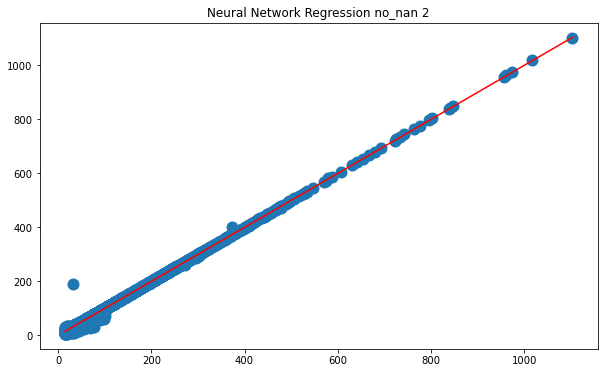

In [114]:
#Create figure
fig, ax = plt.subplots(figsize=(10, 6))

#Plot points using test data points (actual data) on x axis and predicted data points on y axis
ax.scatter(y_test_no_nan_sample, y_pred_neuralnet_regression_no_nan_2, linewidths=6)

#Plot a line showing the actual test data points, so we can compare it to the predicted data points
ax.plot([y_test_no_nan_sample.min(), y_test_no_nan_sample.max()], [y_test_no_nan_sample.min(), y_test_no_nan_sample.max()], color='red')

plt.title('Neural Network Regression no_nan 2')
fig.show()

<ipython-input-115-d7127d436b0e>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


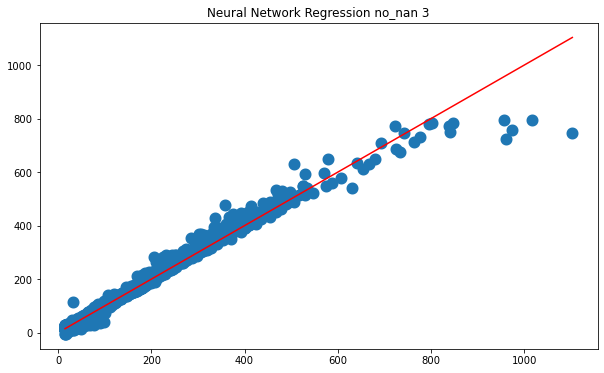

In [115]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y_test_no_nan_sample, y_pred_neuralnet_regression_no_nan_3, linewidths=6)
ax.plot([y_test_no_nan_sample.min(), y_test_no_nan_sample.max()], [y_test_no_nan_sample.min(), y_test_no_nan_sample.max()], color='red')

plt.title('Neural Network Regression no_nan 3')
fig.show()

<ipython-input-116-2d49b641fca0>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


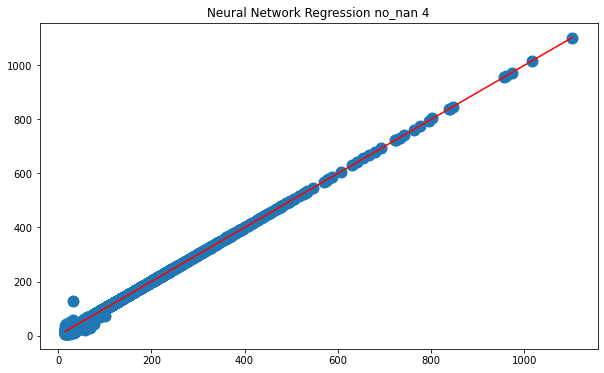

In [116]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y_test_no_nan_sample, y_pred_neuralnet_regression_no_nan_4, linewidths=6)
ax.plot([y_test_no_nan_sample.min(), y_test_no_nan_sample.max()], [y_test_no_nan_sample.min(), y_test_no_nan_sample.max()], color='red')

plt.title('Neural Network Regression no_nan 4')
fig.show()

<ipython-input-117-18f7d0297818>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


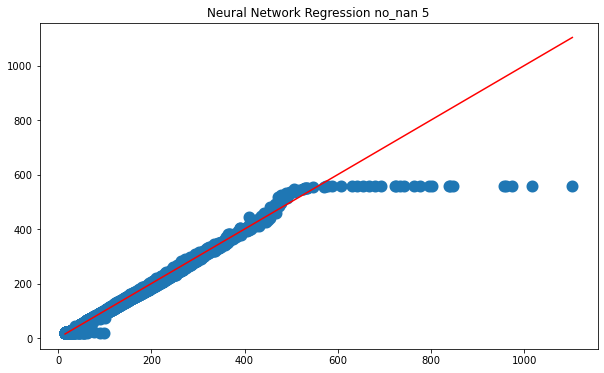

In [117]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y_test_no_nan_sample, y_pred_neuralnet_regression_no_nan_5, linewidths=6)
ax.plot([y_test_no_nan_sample.min(), y_test_no_nan_sample.max()], [y_test_no_nan_sample.min(), y_test_no_nan_sample.max()], color='red')

plt.title('Neural Network Regression no_nan 5')
fig.show()

## Conclusion:

As we can see, the best model is **Neural Networks Model 4**, because we have the smallest MSE and the bigger R2_score. 

**Visual:**
It´s the one that makes the most correct predictions, thus having the smallest difference between the spots predicted and the line traced by the actual data.

## Exercici 4
#### Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

***(In order to simplify the exercise I´ll consider only the Linear Regression and Neural Networks Regression models)***

## Linear Regression Full Dataset

In [118]:
linear_regression_fulldataset = linear_regression.fit(X_no_nan, y_no_nan)

In [119]:
y_pred_linear_regression_fulldataset = linear_regression_fulldataset.predict(X_no_nan)

In [120]:
print('Linear Regression nonan Full Dataset')
print('-----------------------')
print(f'MSE: {mean_squared_error(y_no_nan, y_pred_linear_regression_fulldataset)}')
print(f'R2: {r2_score(y_no_nan, y_pred_linear_regression_fulldataset)}')

Linear Regression nonan Full Dataset
-----------------------
MSE: 3.970024499434873
R2: 0.9989244101134743


## Neural Networks Regression Full Dataset

In [81]:
neural_networks_regression_fulldataset = neural_networks_regression.fit(X_no_nan_sample, y_no_nan_sample)

In [82]:
y_pred_neural_networks_regression_fulldataset = neural_networks_regression_fulldataset.predict(X_no_nan_sample)

In [83]:
print('Neural Networks Regression nonan Full Dataset')
print('-----------------------')
print(f'MSE: {mean_squared_error(y_no_nan_sample, y_pred_neural_networks_regression_fulldataset)}')
print(f'R2: {r2_score(y_no_nan_sample, y_pred_neural_networks_regression_fulldataset)}')

Neural Networks Regression nonan Full Dataset
-----------------------
MSE: 1.387051227541919
R2: 0.9996128864573677


# Nivell 2
## Exercici 5
#### Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

In [121]:
df_delay.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [125]:
df_delay_orgn_dest = pd.get_dummies(data=df_delay, columns=['Origin', 'Dest'])

In [129]:
df_delay.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [131]:
df_delay_orgn_dest_cols_drop = df_delay_orgn_dest.drop(columns=['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 
                                                                'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
                                                                'CRSArrTime', 'UniqueCarrier', 'FlightNum',
                                                                'TailNum', 'Cancelled', 'CancellationCode', 
                                                                'Diverted', 'CarrierDelay', 'WeatherDelay', 
                                                                'NASDelay', 'SecurityDelay', 'LateAircraftDelay'])

In [145]:
df_delay_orgn_dest_cols_drop_sample = df_delay_orgn_dest_cols_drop.sample(n=int(round(df_delay_orgn_dest_cols_drop.shape[0]*0.25, 0)))

In [146]:
df_delay_orgn_dest_cols_drop_sample.shape

(484190, 615)

**Remove all Nan**

In [149]:
df_delay_orgn_dest_cols_drop_sample_dropna = df_delay_orgn_dest_cols_drop_sample.dropna()

**Choose features and Target variables**

In [156]:
X_eng = df_delay_orgn_dest_cols_drop_sample_dropna.drop(columns=['ArrDelay'])
y_eng = df_delay_orgn_dest_cols_drop_sample_dropna['ArrDelay']

In [160]:
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(X_eng, y_eng, test_size=0.33)

## Linear Regression Engineered Dataset

In [157]:
linear_regression_eng = linear_regression.fit(X_eng, y_eng)

In [158]:
y_pred_linear_regression_eng = linear_regression_eng.predict(X_eng)

In [159]:
print('Linear Regression nonan Engineered Dataset')
print('-----------------------')
print(f'MSE: {mean_squared_error(y_eng, y_pred_linear_regression_eng)}')
print(f'R2: {r2_score(y_eng, y_pred_linear_regression_eng)}')

Linear Regression nonan Engineered Dataset
-----------------------
MSE: 1.0365848930873737e-05
R2: 0.9999999968001172


**Train Test approach**

In [161]:
linear_regression_eng_train_test = linear_regression.fit(X_train_eng, y_train_eng)

In [162]:
y_pred_linear_regression_eng_train_test = linear_regression_eng_train_test.predict(X_test_eng)

In [164]:
print('Linear Regression nonan Engineered Dataset Train Test')
print('-----------------------')
print(f'MSE: {mean_squared_error(y_test_eng, y_pred_linear_regression_eng_train_test)}')
print(f'R2: {r2_score(y_test_eng, y_pred_linear_regression_eng_train_test)}')

Linear Regression nonan Engineered Dataset Train Test
-----------------------
MSE: 6.300676657362911e-06
R2: 0.9999999980705863


## Neural Networks Regression Engineered Dataset

In [165]:
neural_networks_regression_eng = neural_networks_regression.fit(X_eng, y_eng)

In [166]:
y_pred_neural_networks_regression_eng = neural_networks_regression_eng.predict(X_eng)

In [167]:
print('Neural Networks Regression nonan Engineered')
print('-----------------------')
print(f'MSE: {mean_squared_error(y_eng, y_pred_neural_networks_regression_eng)}')
print(f'R2: {r2_score(y_eng, y_pred_neural_networks_regression_eng)}')

Neural Networks Regression nonan Engineered
-----------------------
MSE: 0.001137850702442291
R2: 0.9999996487514983


# Nivell 3
## Exercici 6
#### No utilitzis la variable DepDelay a l’hora de fer prediccions

In [170]:
X_no_nan_noDepDelay = X_no_nan.drop(columns=['DepDelay'])

## Linear Regression

**Train Test approach**

In [171]:
linear_regression_noDepDelay = linear_regression.fit(X_no_nan_noDepDelay, y_no_nan)

In [172]:
y_pred_linear_regression_noDepDelay = linear_regression_noDepDelay.predict(X_no_nan_noDepDelay)

In [173]:
print('Linear Regression nonan no DepDelay')
print('-----------------------')
print(f'MSE: {mean_squared_error(y_no_nan, y_pred_linear_regression_noDepDelay)}')
print(f'R2: {r2_score(y_no_nan, y_pred_linear_regression_noDepDelay)}')

Linear Regression nonan no DepDelay
-----------------------
MSE: 4.085447210060382
R2: 0.9988931388958177


## Neural Networks Regression

**Train Test approach**

In [176]:
neural_networks_regression_noDepDelay = neural_networks_regression.fit(X_no_nan_noDepDelay, y_no_nan)

In [177]:
y_pred_neuralnet_regression_noDepDelay = neural_networks_regression_noDepDelay.predict(X_no_nan_noDepDelay)

In [178]:
print('Neural Networks Regression nonan no DepDelay')
print('-----------------------')
print(f'MSE: {mean_squared_error(y_no_nan, y_pred_neuralnet_regression_noDepDelay)}')
print(f'R2: {r2_score(y_no_nan, y_pred_neuralnet_regression_noDepDelay)}')

Neural Networks Regression nonan no DepDelay
-----------------------
MSE: 2.5082907941381842
R2: 0.9993204343673384
